In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [5]:
dfs = []
for filename in glob.glob("*q1.csv"):
    dfs.append(
        pd.read_csv(filename,low_memory=True)
    )

df = pd.concat(dfs).reset_index(drop=True)
dfs = None

In [6]:
df["start_time"] = pd.to_datetime(df["start_time"])
df["end_time"] = pd.to_datetime(df["end_time"])

In [16]:
df = df.sort_values(by="start_time").reset_index(drop=True)

In [17]:
df.groupby(by=df['start_time'].dt.date).count()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
start_time,,,,,,,,,,,,,,,
2018-01-01,206,206,206,206,206,206,206,206,198,198,206,206,206,206,0
2018-01-02,652,652,652,652,652,652,652,652,649,649,652,652,652,652,0
2018-01-03,980,980,980,980,980,980,980,980,970,970,980,980,980,980,0
2018-01-04,115,115,115,115,115,115,115,115,113,113,115,115,115,115,0
2018-01-05,243,243,243,243,243,243,243,243,226,226,243,243,243,243,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,1332,1332,1332,1332,1332,1332,1332,1332,1307,1307,1332,1332,1332,1332,1332
2020-03-28,311,311,311,311,311,311,311,311,304,304,311,311,311,311,311
2020-03-29,853,853,853,853,853,853,853,853,834,834,853,853,853,853,853


In [8]:
df_timeindex = df.set_index("start_time")

In [15]:
df_timeindex.between_time('08:00','10:00')

,trip_id,duration,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
start_time,,,,,,,,,,,,,,
2018-01-01 08:04:00,223898257,11,2018-01-01 08:15:00,3064,39.938400,-75.173271,3037,39.954239,-75.161377,3664,30,One Way,Indego30,NaN
2018-01-01 08:12:00,223898256,9,2018-01-01 08:21:00,3032,39.945271,-75.179710,3029,39.953800,-75.194794,2508,30,One Way,Indego30,NaN
2018-01-01 08:35:00,223898255,6,2018-01-01 08:41:00,3056,39.976688,-75.158127,3075,39.967178,-75.161247,3659,30,One Way,Indego30,NaN
2018-01-01 08:40:00,223898254,1,2018-01-01 08:41:00,3023,39.950481,-75.172859,3023,39.950481,-75.172859,11786,30,Round Trip,Indego30,NaN
2018-01-01 08:43:00,223901907,33,2018-01-01 09:16:00,3023,39.950481,-75.172859,3033,39.950050,-75.156723,5184,30,One Way,Indego30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31 09:33:00,338640676,8,2020-03-31 09:41:00,3050,39.953388,-75.154259,3013,39.963169,-75.147919,19963,30,One Way,Indego30,electric
2020-03-31 09:37:00,338640675,9,2020-03-31 09:46:00,3052,39.947319,-75.156952,3154,39.959240,-75.158211,11008,365,One Way,Indego365,standard
2020-03-31 09:53:00,338640674,6,2020-03-31 09:59:00,3185,39.951691,-75.158882,3101,39.942951,-75.159554,11718,30,One Way,Indego30,standard


In [10]:
df_timeindex[
    (df_timeindex["end_time"] >= pd.to_datetime("2018-01-01"))
    &
    (df_timeindex["end_time"] < pd.to_datetime("2018-01-02"))
]

,trip_id,duration,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
start_time,,,,,,,,,,,,,,
2018-01-01 00:24:00,223869188,18,2018-01-01 00:42:00,3124,39.952950,-75.139793,3073,39.961430,-75.152420,3708,30,One Way,Indego30,NaN
2018-01-01 00:38:00,223905597,572,2018-01-01 10:10:00,3023,39.950481,-75.172859,3066,39.945610,-75.173477,3288,365,One Way,Indego365,NaN
2018-01-01 00:48:00,223872811,22,2018-01-01 01:10:00,3026,39.941380,-75.145638,3023,39.950481,-75.172859,11735,30,One Way,Indego30,NaN
2018-01-01 01:03:00,223872810,21,2018-01-01 01:24:00,3045,39.947922,-75.162369,3037,39.954239,-75.161377,5202,30,One Way,Indego30,NaN
2018-01-01 01:05:00,223872809,4,2018-01-01 01:09:00,3115,39.972630,-75.167572,3058,39.967159,-75.170013,5142,30,One Way,Indego30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 22:41:00,223950506,8,2018-01-01 22:49:00,3121,39.972740,-75.179390,3071,39.961731,-75.187881,3430,30,One Way,Indego30,NaN
2018-01-01 22:46:00,223950504,11,2018-01-01 22:57:00,3099,39.934010,-75.150940,3114,39.937752,-75.180122,3326,365,One Way,IndegoFlex,NaN
2018-01-01 23:00:00,223954333,4,2018-01-01 23:04:00,3052,39.947319,-75.156952,3010,39.947109,-75.166183,11894,30,One Way,Indego30,NaN


In [11]:
month1 = df_timeindex[
    (df_timeindex["end_time"] >= pd.to_datetime("2018-01-01"))]

month2 = df_timeindex[
    (df_timeindex["end_time"] < pd.to_datetime("2018-01-02"))]

KeyError: 0

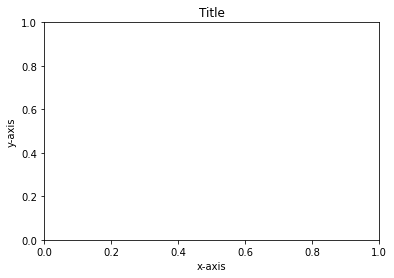

In [12]:
figure1 = plt.figure()
q1_2018 = figure1.add_subplot(111)
q1_2018.set_title("Title")
q1_2018.set_xlabel("x-axis")
q1_2018.set_ylabel("y-axis")
q1_2018.bar(month1[0],month2[2])

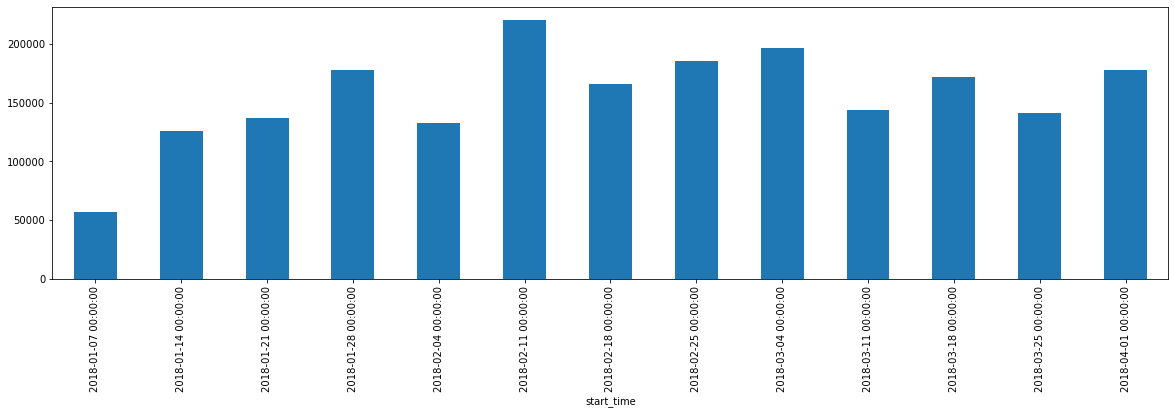

In [18]:
df_timeindex[
    (df_timeindex["end_time"] >= pd.to_datetime("2018-01-01"))
    &
    (df_timeindex["end_time"] < pd.to_datetime("2018-04-01"))
].resample("1W").duration.sum().plot(kind="bar", figsize=(20,5))

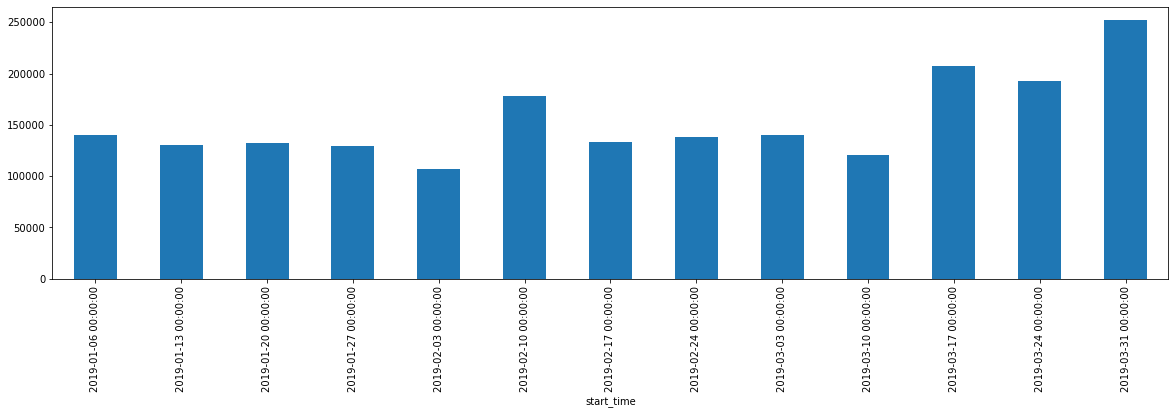

In [19]:
df_timeindex[
    (df_timeindex["end_time"] >= pd.to_datetime("2019-01-01"))
    &
    (df_timeindex["end_time"] < pd.to_datetime("2019-04-01"))
].resample("1W").duration.sum().plot(kind="bar", figsize=(20,5))

In [35]:
q1_2020= df_timeindex[
    (df_timeindex["end_time"] >= pd.to_datetime("2020-01-01"))
    &
    (df_timeindex["end_time"] < pd.to_datetime("2020-04-01"))
].resample("1W").duration.sum()

In [39]:
q1_2020_plot = q1_2020.plot(kind="bar", figsize=(20,5)

SyntaxError: unexpected EOF while parsing (<ipython-input-39-442cf2d7774f>, line 1)

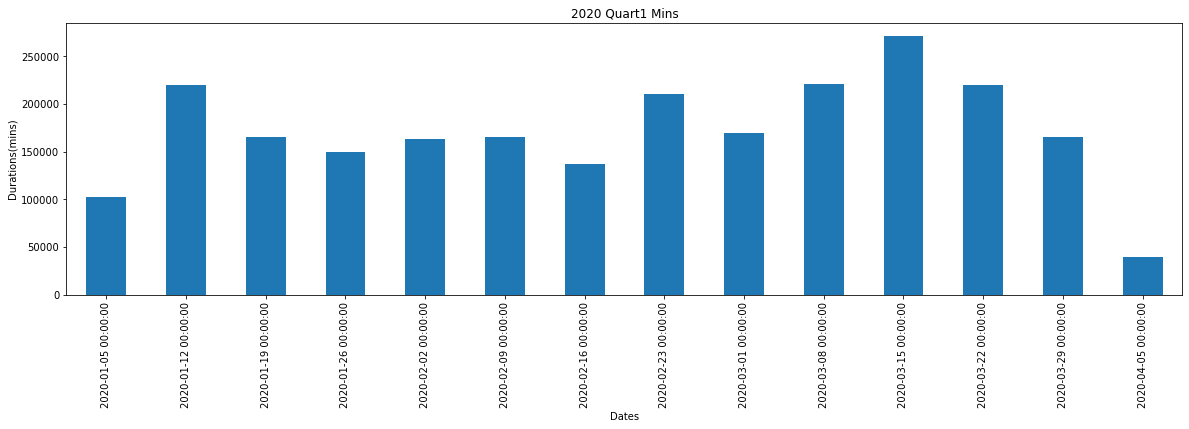

In [33]:
df_timeindex[
    (df_timeindex["end_time"] >= pd.to_datetime("2020-01-01"))
    &
    (df_timeindex["end_time"] < pd.to_datetime("2020-04-01"))].resample("1W").duration.sum().plot(kind="bar", xlabel="Dates", ylabel="Durations(mins)",
                                     title="2020 Quart1 Mins", figsize=(20,5)).